In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
df = pd.read_csv(r'C:\Users\AKASH\OneDrive - iitkgp.ac.in\Documents\Life saver\U005-project-Python-AB-testing-Comprehensive-master\ab_data.csv')

In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.info(),df.converted.unique(),df.landing_page.unique(),df.group.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


(None,
 array([0, 1], dtype=int64),
 array(['old_page', 'new_page'], dtype=object),
 array(['control', 'treatment'], dtype=object))

In [6]:
df.user_id.nunique()

290584

In [7]:
df.query('converted == 1').user_id.size / df.user_id.size

0.11965919355605512

In [8]:
df.query('landing_page == "old_page" and group == "treatment"').user_id.size #1965
df.query('landing_page == "new_page" and group == "control"').user_id.nunique() #1928

1928

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [11]:
df_a = df.query('landing_page == "old_page" and group == "control"') 
df_b = df.query('landing_page == "new_page" and group == "treatment"')
df2 = pd.concat([df_a, df_b], ignore_index=True)

In [12]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [13]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [14]:
df2.user_id.nunique()

290584

In [15]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2.iloc[146678]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 146678, dtype: object

In [17]:
df2 = df2.drop(146678)
df2 = df2.reset_index(drop=True)
df2.iloc[146678]

user_id                             884145
timestamp       2017-01-09 15:45:38.457508
group                            treatment
landing_page                      new_page
converted                                0
Name: 146678, dtype: object

In [18]:
df2.converted.mean()

0.11959708724499628

In [19]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

In [20]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

In [21]:
df2.query('landing_page == "new_page"').user_id.size / df2.user_id.size

0.5000619442226688

The probability of conversion in general is 11.9%. In "control GRP", it's 12% and in "treatment GRP", it's 11.8%. Thus we don't have enough clue to say the new treatment page leads to more conversions

For now, consider you need to make the decision just based on all the data provided. We want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, We can state your hypothesis in terms of words or in terms of pold and pnew, which are the converted rates for the old and new pages.

Null hypothesis: pold>pnew

Alternate hypothesis: pold < pnew
where pold is the probability of control group converted and pnew is probability of treatment group converted

In [23]:
# We want to get p(old) under the null hypothesis, not as we observe it in the data.
# Consider the whole data, and how p(new) should relate to p(old) under the null.
# the null hypothesis states the treatment has no effect on the probability of conversion. 
# So what would we expect p(new) - p(old) to be? SAME
# NO more...df2.query('group == "treatment"').converted.mean()
df2.converted.mean()

0.11959708724499628

In [24]:
# We want to get p(old) under the null hypothesis, not as we observe it in the data.
# Consider the whole data, and how p(new) should relate to p(old) under the null.
# the null hypothesis states the treatment has no effect on the probability of conversion. 
# So what would we expect p(new) - p(old) to be? SAME
# NO more...df2.query('group == "control"').converted.mean()
df2.converted.mean()

0.11959708724499628

In [25]:
df2.query('group == "treatment"').user_id.size

145310

In [26]:
df2.query('group == "control"').user_id.size 

145274

In [27]:
new_page_converted = np.random.choice([0,1], size=145310, p=[1-0.1196, 0.1196]); new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
old_page_converted = np.random.choice([0,1], size=145274, p=[1-0.1196, 0.1196]); old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
new_page_converted.mean() - old_page_converted.mean()

-0.0026793621890514457

In [30]:
p_diffs = []

for i in range(10000):
    control_df = np.random.choice([0,1], size=145274, p=[1-0.1196, 0.1196])
    treat_df = np.random.choice([0,1], size=145310, p=[1-0.1196, 0.1196])
    p_old = control_df.mean()
    p_new = treat_df.mean()
    p_diffs.append(p_new - p_old)

p_diffs = np.array(p_diffs)   

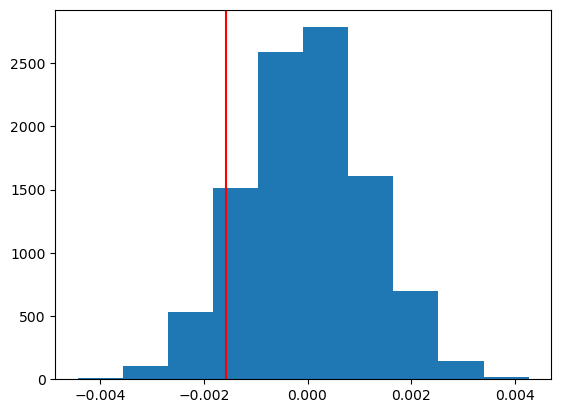

In [31]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(x=-0.001576, color='r')

In [32]:
(p_diffs > -0.001576).mean()

0.9054

In [33]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').user_id.size
convert_new = df2.query('group == "treatment" and converted == 1').user_id.size
n_old = df2.query('group == "control"').user_id.size
n_new = df2.query('group == "treatment"').user_id.size
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

In [34]:
# Two sample Hypothesis test. We typically use a 't-test' when our number of samples is low (< 30). The t-test assumes a wider 
#distribution (more spread). We typically use a 'z-test' when we have >= 30 samples. The 'z-test' assumes a narrower distribution
#(less spread).----`proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)`

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value # but here, P_value is for two_tailed test..we need one tailed test. 

(1.3109241984234394, 0.18988337448195103)

In [35]:
# Before this test began, we would have picked a significance level. Let's just say it's 95%. According to the Hypothesis setting
#, it's a one-tail test so a z-score past 1.64 will be significant. (if two-tail, then -1.96 to 1.96)

from scipy.stats import norm

norm.cdf(1.3109241984234394), norm.ppf(1-(0.05))

(0.9050583127590245, 1.6448536269514722)

Since the z-score of 1.3109241984234394 does not exceeds the critical value of 1.6448536269514722, and the P-value is 0.905 so we cannot reject the null hypothesis that the difference between the two proportions is no different from zero. The result from this z-test matches exactly our previous simulation and the P-value here as well.

The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control

In [36]:
df2['intercept'] = 1

df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])
#or
#page_dummy = pd.get_dummies(df2['landing_page'])
#df_new = df2.join(page_dummy)

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
   
df2.head()    

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,False,True,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,False,True,False
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,False,True,False
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,False,True,False
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,False,True,False


Use statsmodels to import your regression model. Instantiate the model, and fit the model using the two columns we got above, to predict whether or not an individual converts.

In [39]:
print(df2[['ab_page', 'intercept']].dtypes)

ab_page       bool
intercept    int64
dtype: object


In [40]:
df2['ab_page'] = df2['ab_page'].astype(int)
df2['intercept'] = df2['intercept'].astype(int)

In [41]:
import statsmodels.api as sm

log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:               8.077e-06
Time:                        12:51:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:               8.077e-06
Time:                        12:52:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [43]:
countries=pd.read_csv(r'C:\Users\AKASH\OneDrive - iitkgp.ac.in\Documents\Life saver\U005-project-Python-AB-testing-Comprehensive-master\countries.csv')

In [44]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
df_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,False,True,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,True,False,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,True,False,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,False,True,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,True,False,1


In [47]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,False,True,0,False,True,False
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,True,False,1,False,False,True
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,True,False,1,False,True,False
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,False,True,0,False,True,False
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,True,False,1,False,True,False


In [49]:
df_new[['US','UK','CA']] = df_new[['US','UK','CA']].astype(int)

In [50]:
log_model_2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK']])
result = log_model_2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:               2.323e-05
Time:                        12:56:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [51]:
### Fitting our Linear Model And Obtain the Results
log_model_us = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US']])
result = log_model_us.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:               2.064e-05
Time:                        12:57:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9867      0.008   -243.359      0.000      -2.003      -1.971
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
US            -0.0434      0.027     -1.627      0.104      -0.096       0.009
==============================================================================
"""

In [52]:
log_model_uk = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK']])
result = log_model_uk.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jun 2025   Pseudo R-squ.:               1.233e-05
Time:                        12:58:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2693
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9919      0.009   -228.420      0.000      -2.009      -1.975
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
UK             0.0126      0.013      0.952      0.341      -0.013       0.038
==============================================================================
"""

Seemingly, there is no significant interaction between 'ab_page' and 'country' because the coefficient of 'ab_page' (-0.015) does not change as 'country' is introduced. Unfortunately, P-values of 'ab_page' (0.19), and 'country' (0.104, 0.341) are considered insignificant, thus again, we cannot reject the Null hypothesis which is 'conversion has no significant relationship with landing_page or country'.